In [1]:
import matplotlib.pyplot as plt
import numpy as np
from astropy.io import fits
import scipy.ndimage as ndimage
from astropy.visualization import simple_norm
from photutils.detection import find_peaks
import photutils.psf as psf

import stuff
import fwhm
import importlib

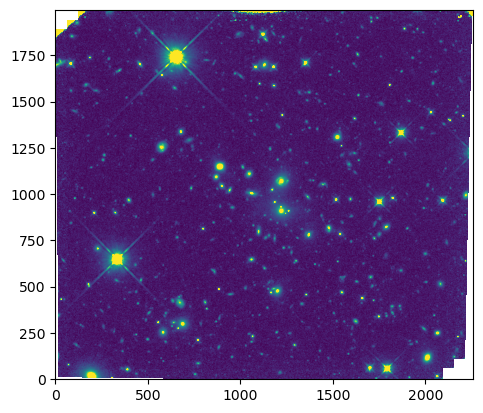

In [13]:
# replace with your file
f=fits.open('final_94_drz.fits') 
imR=f[1].data
f.close()
imR[imR<0]=0
norm = simple_norm(imR, 'sqrt', percent=99.)
plt.imshow(imR, norm=norm, origin='lower', cmap='viridis')


In [14]:
# change threshold value
peaks_tbl = find_peaks(imR, threshold=50)  
peaks_tbl['peak_value'].info.format = '%.8g'
print(peaks_tbl)  

x_peak y_peak peak_value
------ ------ ----------
  1795     57  599.11743
  1701     61  69.844414
   337    646   4277.166
  1752    957  205.85056
  2094    964  72.179817
  1868   1329  442.20682
    85   1702  59.653767
  1353   1707  54.344521
   645   1734  51.956333
   653   1738   8053.397
   ...    ...        ...
    60   1901  87.752701
    75   1938  591.56042
    76   1938  591.56042
    75   1939  591.56042
    76   1939  591.56042
  2191   1955  78.311798
  2193   1956  487.03494
  2194   1956  487.03494
  2193   1957  487.03494
  2194   1957  487.03494
Length = 25 rows


25 stars


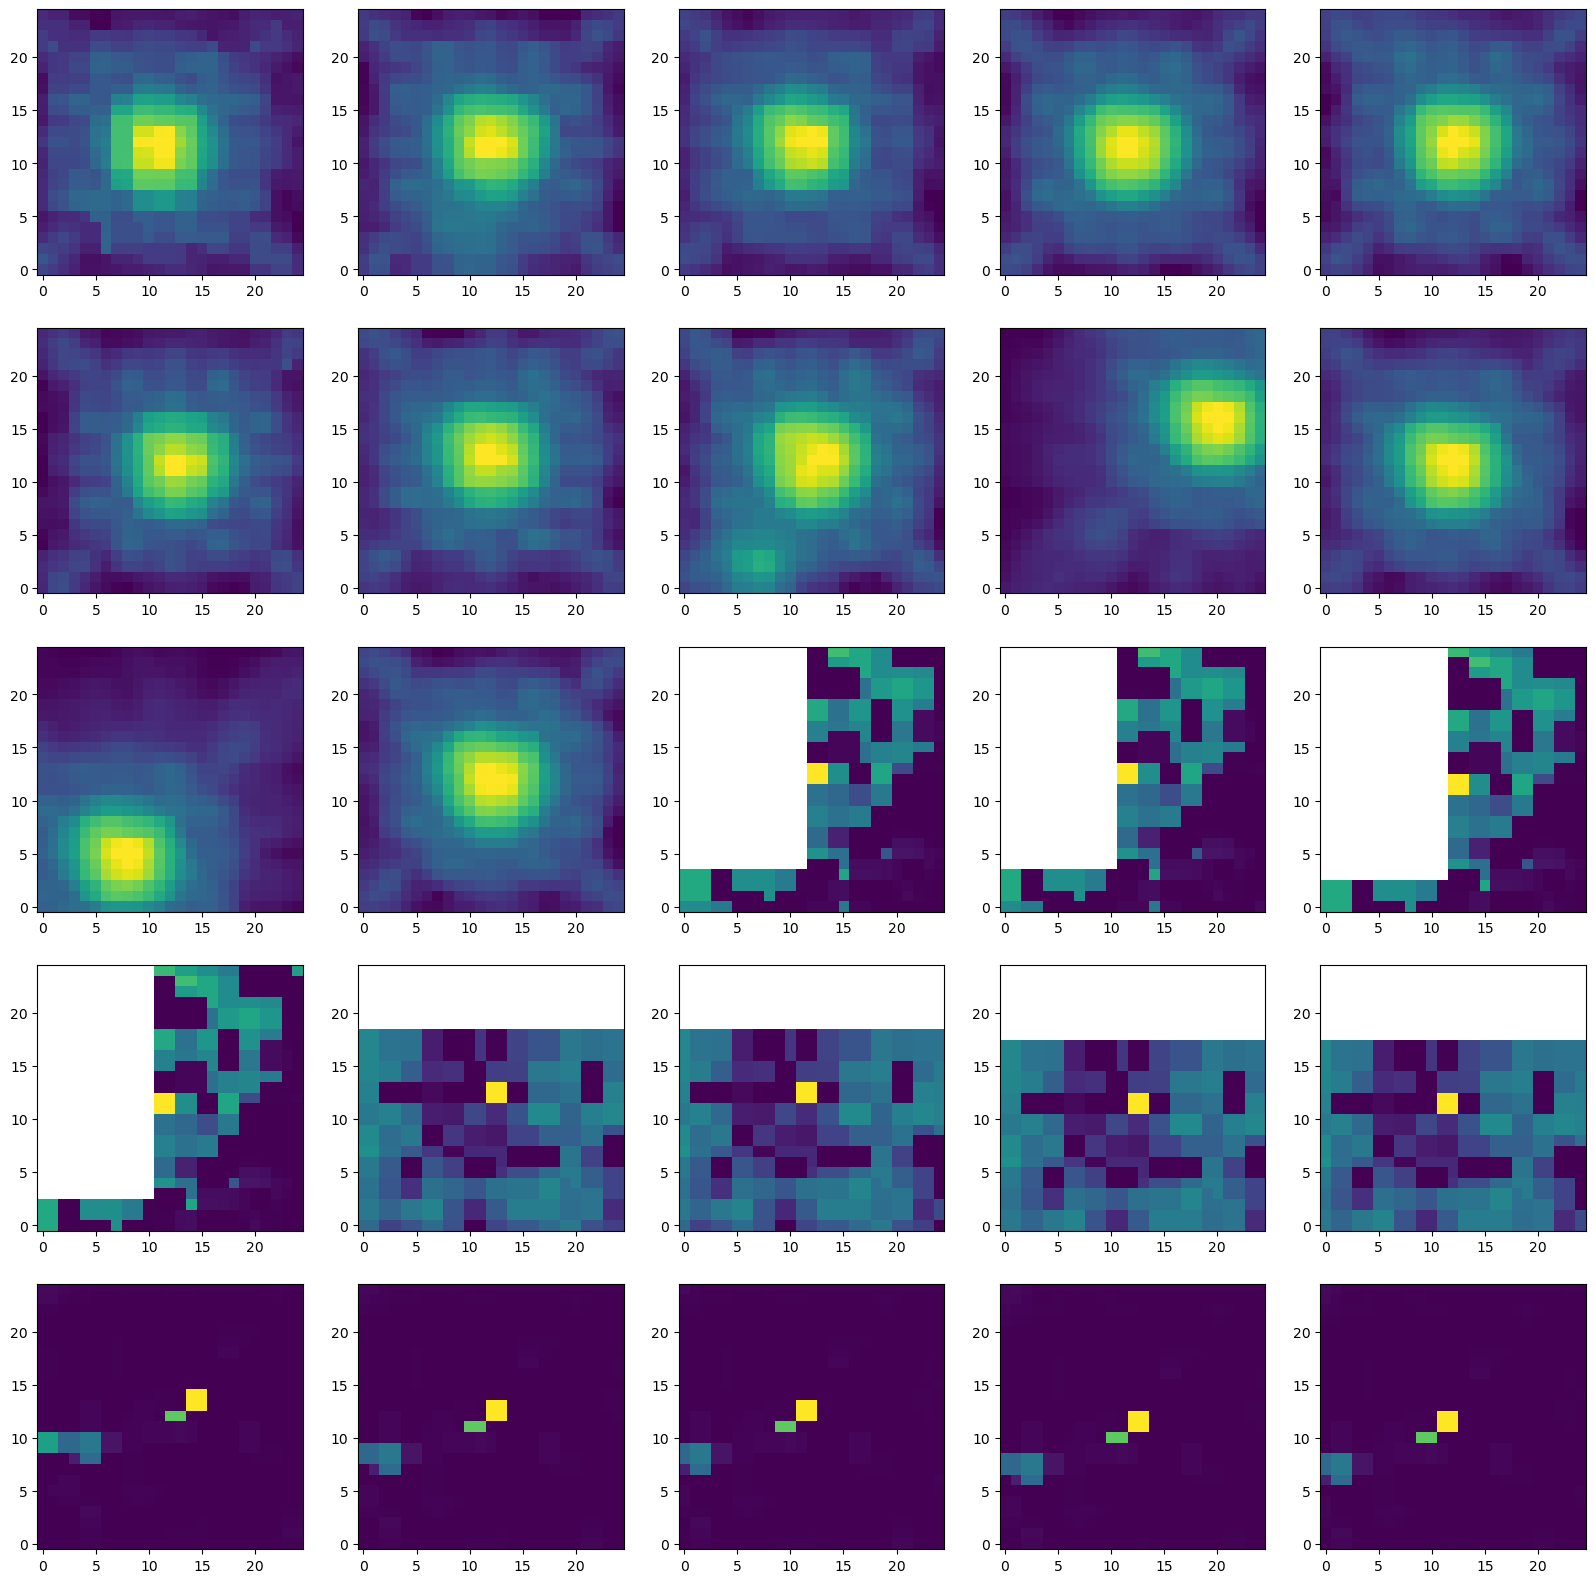

In [15]:
stars = stuff.coordsToStars(imR, peaks_tbl)

EPSFBuilder (1 maxiters):   0%|          | 0/1 [00:00<?, ?it/s]

<class 'astropy.io.fits.hdu.image.PrimaryHDU'>


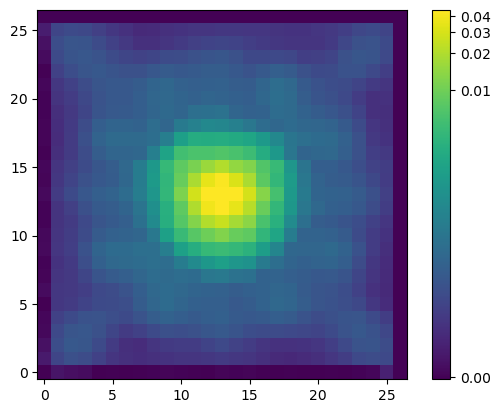

In [37]:
#look at the output above and decide which ones you want
starsIWant = np.r_[1:7,[9,11]]

builder= psf.EPSFBuilder(maxiters=1,oversampling=1)
epsf, fitted_stars = builder.build_epsf(stars[1:7])

norm = simple_norm(epsf.data, 'log', percent=99.0)
plt.imshow(epsf.data, norm=norm, origin='lower', cmap='viridis')
plt.colorbar()

pee_ess_eff = fits.PrimaryHDU(epsf.data)
pee_ess_eff.writeto('psf238.fits',overwrite=True)